**Elaborado por Valentin Moreno Vasquez**

Deep Learning YOLO


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Vinculación de la data este link sale de roboflow al darle descargar dataset

In [ ]:
!curl -L "https://app.roboflow.com/ds/4BlUjzJcXf?key=dF3CkNKNKQ" > roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   2304      0 --:--:-- --:--:-- --:--:--  2306
100 8730k  100 8730k    0     0  8190k      0  0:00:01  0:00:01 --:--:-- 12.7M


descomprimimos los archivos

In [ ]:
!unzip /content/roboflow.zip -d /content/roboflow/

Archive:  /content/roboflow.zip
replace /content/roboflow/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import cv2
from google.colab.patches import cv2_imshow

Visualización

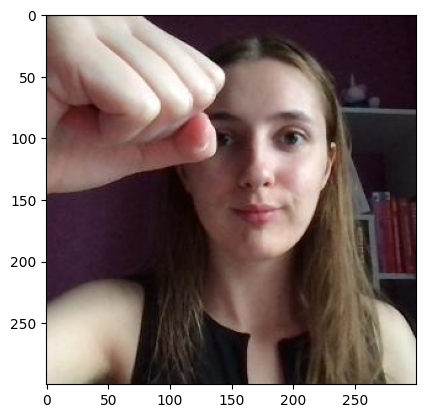

In [ ]:
plt.figure()
img = plt.imread('/content/roboflow/train/images/nasmi_116_png.rf.7c48c0777a5b09dfca6bbdcb05bf4aab.jpg')
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(300, 300, 3)

In [ ]:
import glob
# Buscar varias extensiones
image_paths = glob.glob('/content/roboflow/train/images/*.jpg')
image_paths += glob.glob('/content/roboflow/train/images/*.jpeg')
image_paths += glob.glob('/content/roboflow/train/images/*.png')

print("Total imágenes encontradas:", len(image_paths))

Total imágenes encontradas: 604


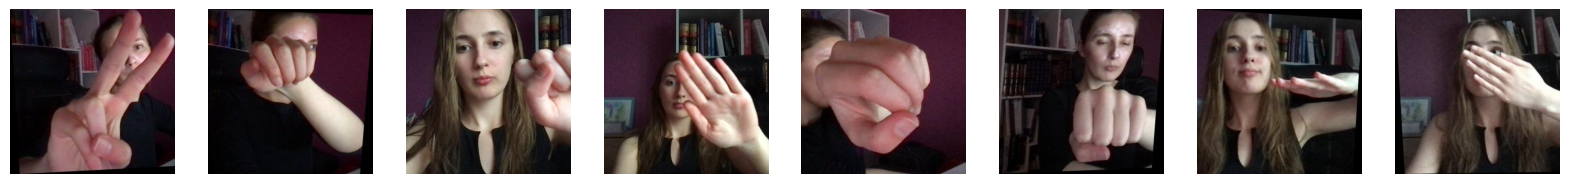

In [ ]:
# Mostrar las primeras 4
plt.figure(figsize=(20, 20))

for i, path in enumerate(image_paths[:8]):
    img = plt.imread(path)
    plt.subplot(1, 8, i + 1)
    plt.imshow(img)
    plt.axis("off")

plt.show()

In [ ]:
import yaml
with open("/content/roboflow/data.yaml", 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
num_classes

'3'

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

In [ ]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.3/112.6 GB disk)


In [ ]:
path='/content/roboflow/test'

# **Yolov8n**

In [ ]:
from ultralytics import YOLO

# Cargar modelo base YOLOv8
model = YOLO('yolov8n.pt')

# Entrenamiento
results = model.train(
    data='/content/roboflow/data.yaml',
    epochs=100,
    imgsz=300,
    project='/content/yolo_results',  # carpeta donde se guardan los resultados
    name='Detection_results',          # subcarpeta dentro del proyecto
    val=True
)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/roboflow/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=300, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Detection_results, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

In [ ]:
with open('/content/roboflow/data.yaml', 'r') as f:
    print(f.read())

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['papers', 'rock', 'scissors']

roboflow:
  workspace: yolovalen
  project: piedra_papel_tijera_valentin_dl_eia-681xm
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/yolovalen/piedra_papel_tijera_valentin_dl_eia-681xm/dataset/2


In [ ]:
results = model.predict("/content/roboflow/test/images/v14_jpg.rf.943ffcaa78440dc12f70da243d0173c1.jpg")


image 1/1 /content/roboflow/test/images/v14_jpg.rf.943ffcaa78440dc12f70da243d0173c1.jpg: 256x320 2 rocks, 41.1ms
Speed: 1.0ms preprocess, 41.1ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'papers', 1: 'rock', 2: 'scissors'}
 obb: None
 orig_img: array([[[217, 213, 202],
         [217, 213, 202],
         [217, 214, 200],
         ...,
         [205, 196, 187],
         [205, 196, 187],
         [205, 196, 187]],
 
        [[217, 213, 202],
         [217, 213, 202],
         [217, 214, 200],
         ...,
         [205, 196, 187],
         [205, 196, 187],
         [205, 196, 187]],
 
        [[217, 213, 202],
         [217, 213, 202],
         [217, 214, 200],
         ...,
         [205, 196, 187],
         [205, 196, 187],
         [205, 196, 187]],
 
        ...,
 
        [[ 73,  89,  78],
         [ 75,  91,  80],
         [ 79,  93,  82],
         ...,
         [151, 156, 155],
         [151, 156, 155],
         [151, 156, 155]],
 
        [[ 76,  92,  81],
         [ 78,  94,  83],
         [ 83,  97,  86],
      

In [ ]:
path='/content/yolo_results/'
subpath='Detection_results'

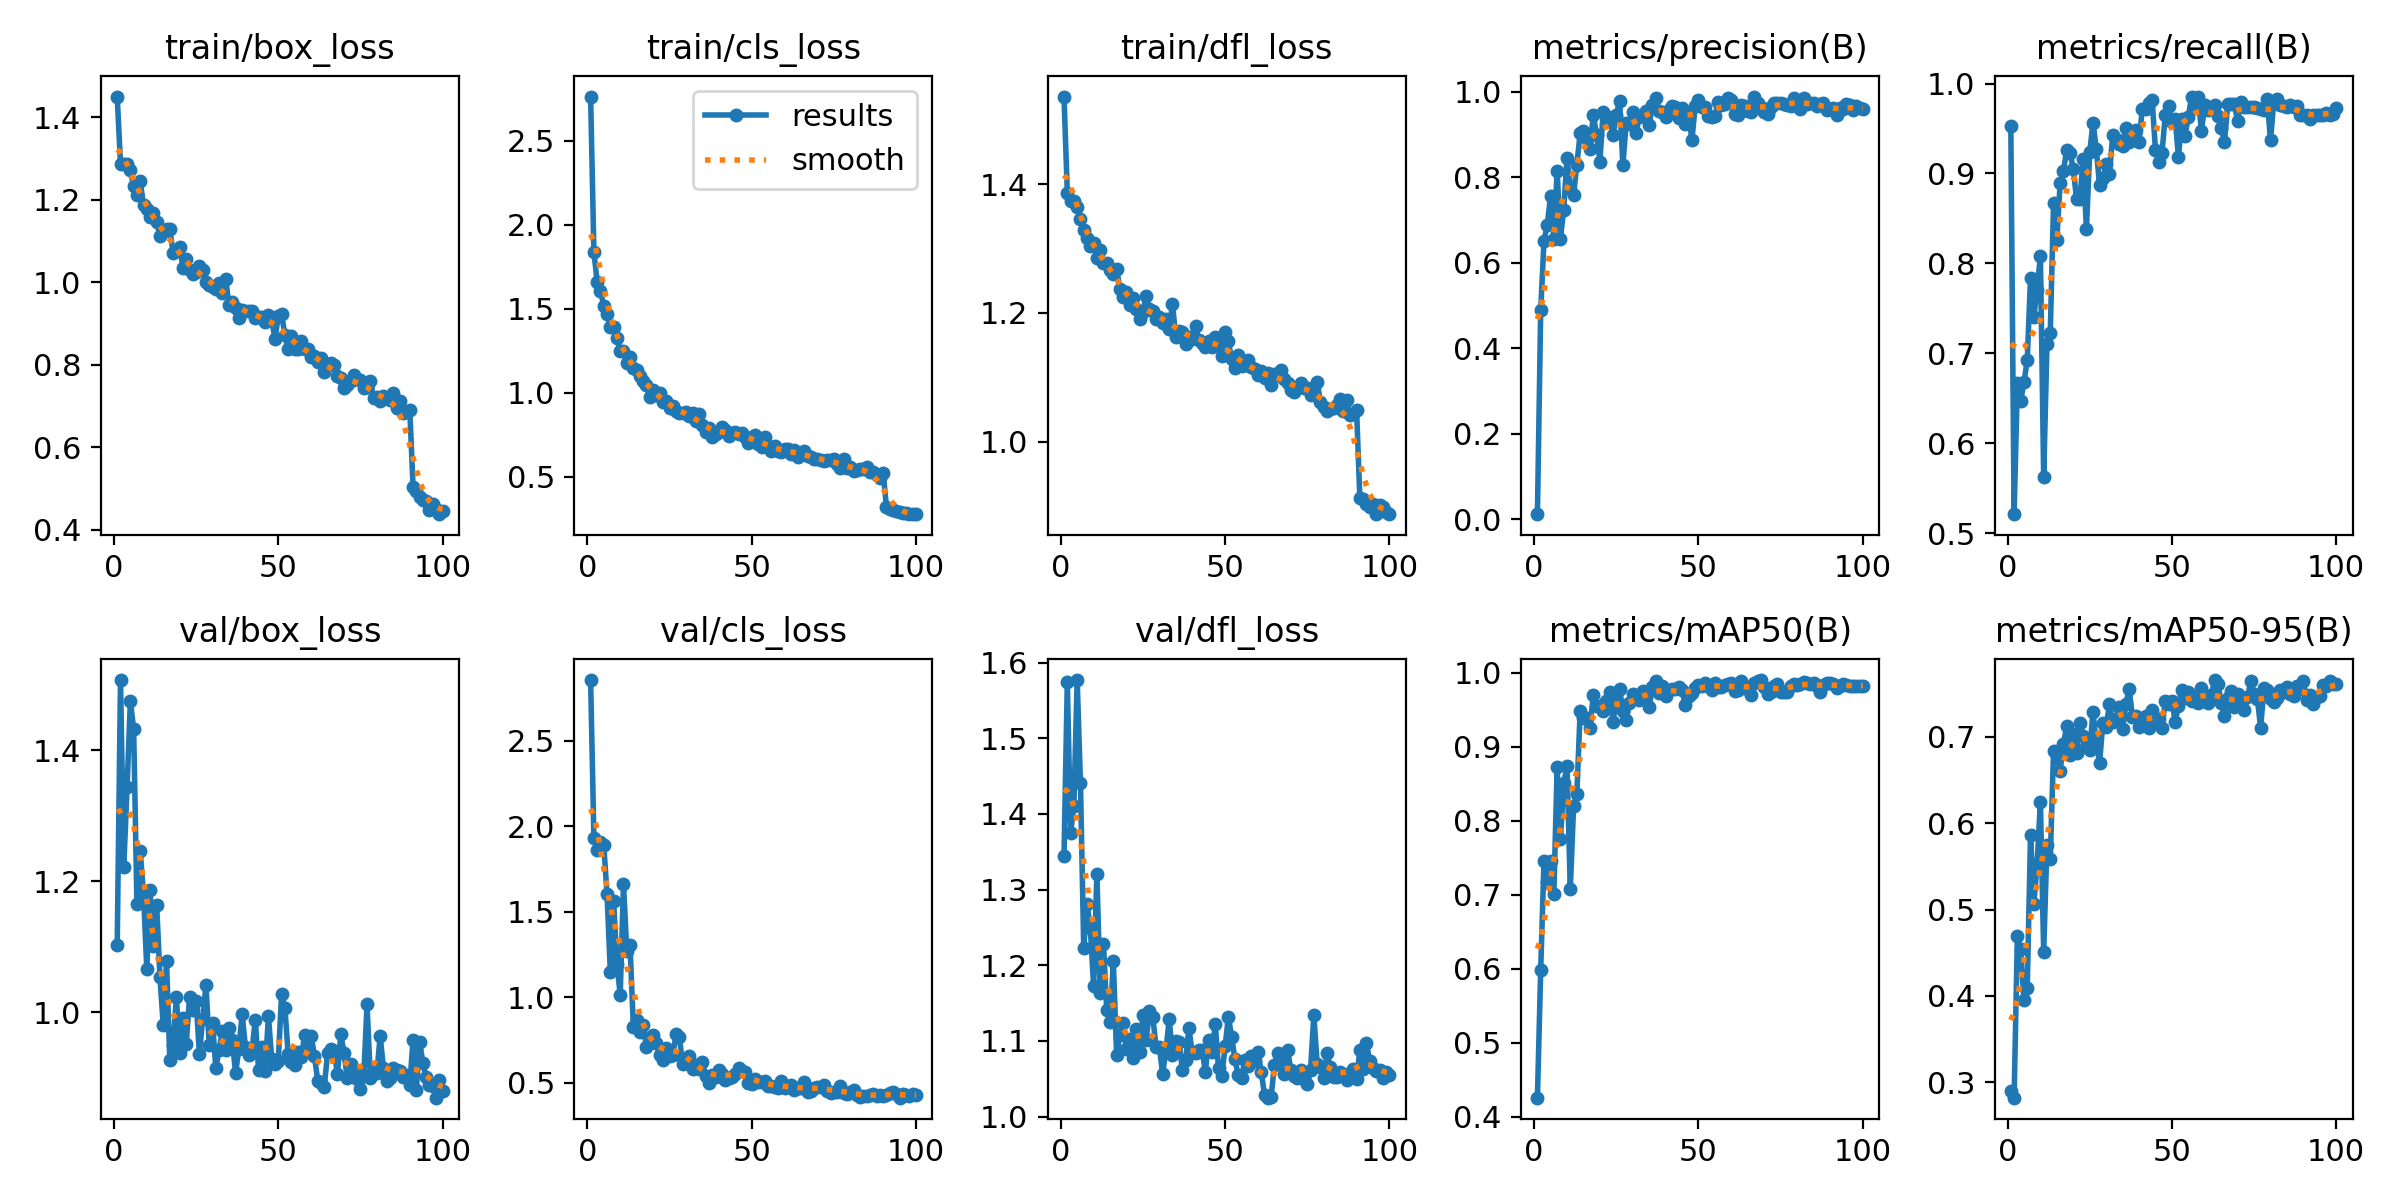

In [ ]:
from IPython.display import Image
Image(filename=path+subpath+'/results.png', width=1000)  # results.png

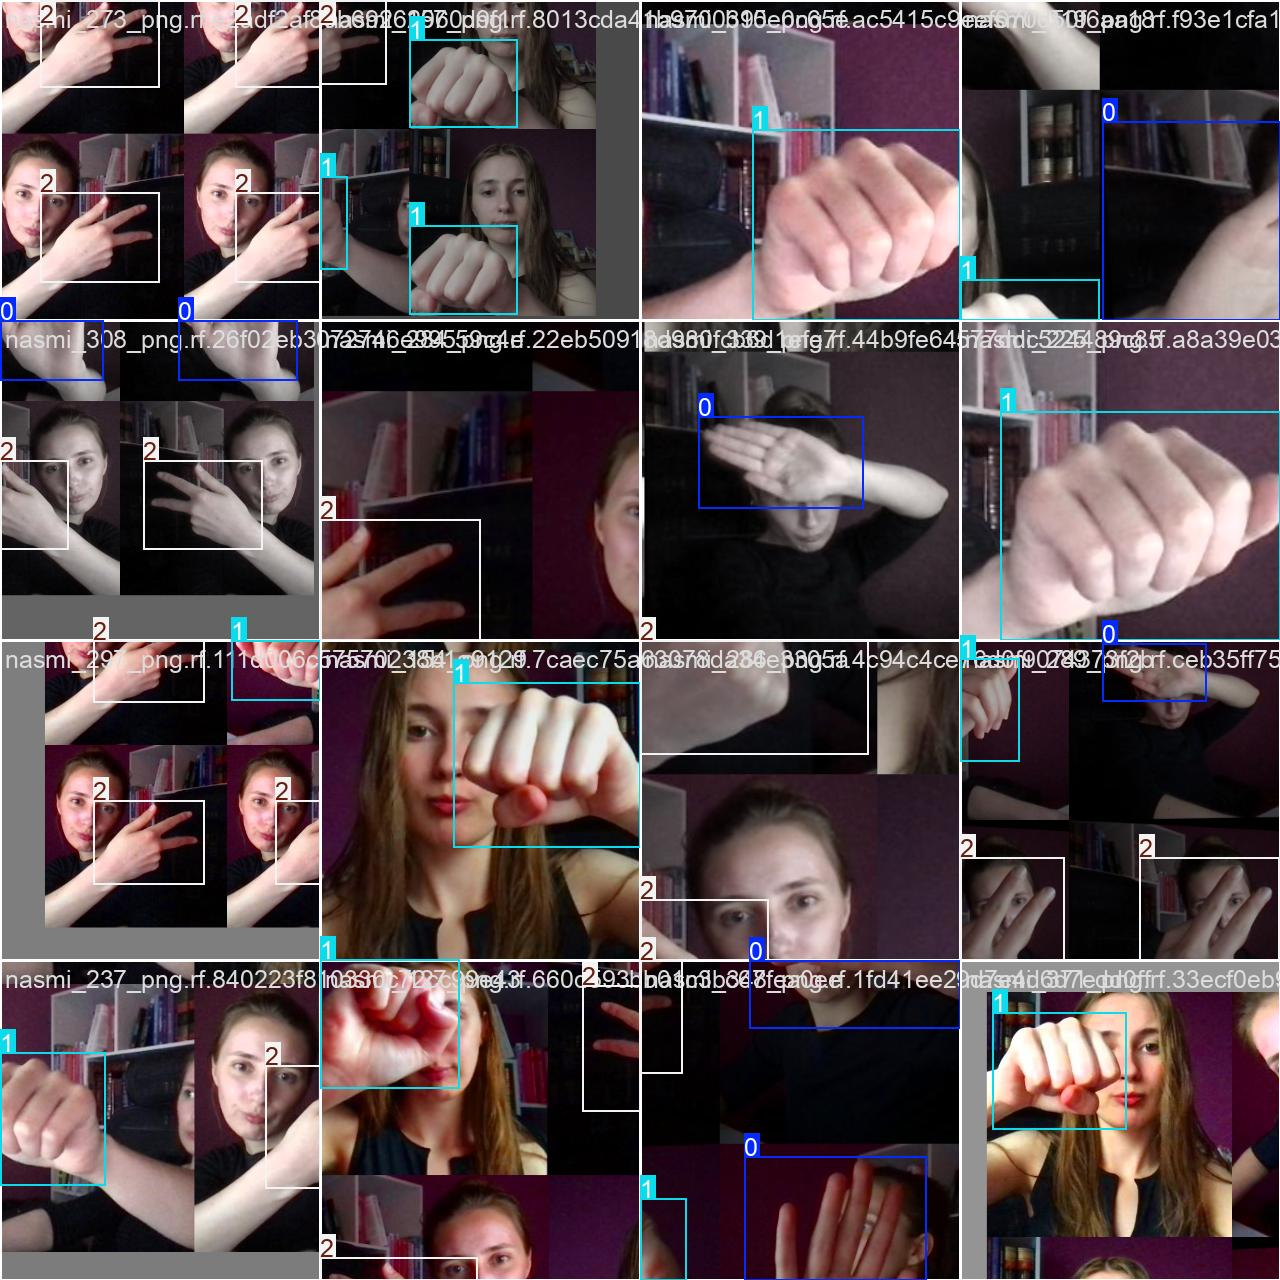

In [ ]:
Image(filename=path+subpath+'/train_batch0.jpg', width=1000)

In [ ]:
metrics = model.val(plots=True)  # no arguments needed, dataset and settings remembered

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 305.0±66.2 MB/s, size: 10.7 KB)
val: Scanning /content/roboflow/valid/labels.cache... 87 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 87/87 62.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 4.2it/s 1.4s
                   all         87         87      0.969      0.976      0.989      0.766
                papers         36         36      0.963      0.972      0.986      0.798
                  rock         28         28          1          1      0.995      0.762
              scissors         23         23      0.946      0.957      0.987      0.737
Speed: 1.3ms preprocess, 4.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/yolo_results/Detection_results2


## Conclusión

El modelo YOLO v8 n entrenado para la detección de **piedra, papel y tijera** mostró un desempeño sobresaliente:

- **Precisión general (P): 0.969**
- **Recall general (R): 0.976**
- **mAP@50: 0.989**
- **mAP@50–95: 0.766**

Estos resultados indican que el modelo logra reconocer correctamente la mayoría de los gestos, manteniendo un excelente equilibrio entre precisión y sensibilidad.  

### Resultados por clase
| Clase     | Precisión | Recall | mAP@50 | mAP@50–95 |
|-----------|-----------|--------|--------|-----------|
| Papel     | 0.963     | 0.972  | 0.986  | 0.798     |
| Piedra    | 1.000     | 1.000  | 0.995  | 0.762     |
| Tijera    | 0.946     | 0.957  | 0.987  | 0.737     |

### Análisis
- El modelo alcanzó un **rendimiento casi perfecto en la clase Piedra**, logrando precisión y recall del 100%.  
- **Papel y Tijera** también presentan métricas muy altas, aunque con una ligera caída en el mAP@50–95, lo que refleja pequeñas dificultades en detecciones más estrictas.  
- En general, el modelo es altamente confiable y apto para aplicaciones prácticas que requieran la clasificación automática de los gestos de este juego.  

En conclusión, YOLO v8 n se confirma como una herramienta eficaz y precisa para la detección de **piedra, papel y tijera**, con métricas que superan ampliamente los estándares mínimos en visión por computadora.

In [ ]:
# Metricas

print(metrics.box.map)    # map50-95 -> Precisión promedio general
print(metrics.box.map50)  # map50 -> Precisión “laxa”
print(metrics.box.map75)  # map75 -> Precisión “estricta”
print(metrics.box.maps)   # lista map50-95 -> mAP de cada clase

0.7657539204075179
0.9892979095247698
0.9775255285723888
[    0.79793     0.76217     0.73715]


## Conclusión

El modelo YOLO v8 n entrenado para la detección de **piedra, papel y tijera** demostró un rendimiento muy sólido.  
El **mAP@50 alcanzó 0.989**, lo que indica que el modelo reconoce de manera casi perfecta las manos cuando se considera una tolerancia de IoU ≥ 0.5.  
Con un criterio más estricto (**mAP@75 = 0.978**), el desempeño se mantiene excelente, lo que resalta la capacidad del modelo para localizar y clasificar los gestos con gran precisión.

En términos globales, el **mAP@50–95 promedio fue de 0.766**, reflejando un buen balance en distintos umbrales de IoU.  
El análisis detallado por clase muestra que:  
- **Piedra**: mAP = 0.798  
- **Papel**: mAP = 0.762  
- **Tijera**: mAP = 0.737  

Estos valores evidencian que el modelo distingue correctamente entre las tres clases, aunque presenta un desempeño ligeramente superior en la detección de **piedra** frente a **papel** y **tijera**.  

En conclusión, YOLO v8 n se consolida como una herramienta efectiva para la detección y clasificación de gestos de **piedra, papel y tijera**, mostrando métricas de alto nivel que lo hacen apto para aplicaciones prácticas, educativas o interactivas.

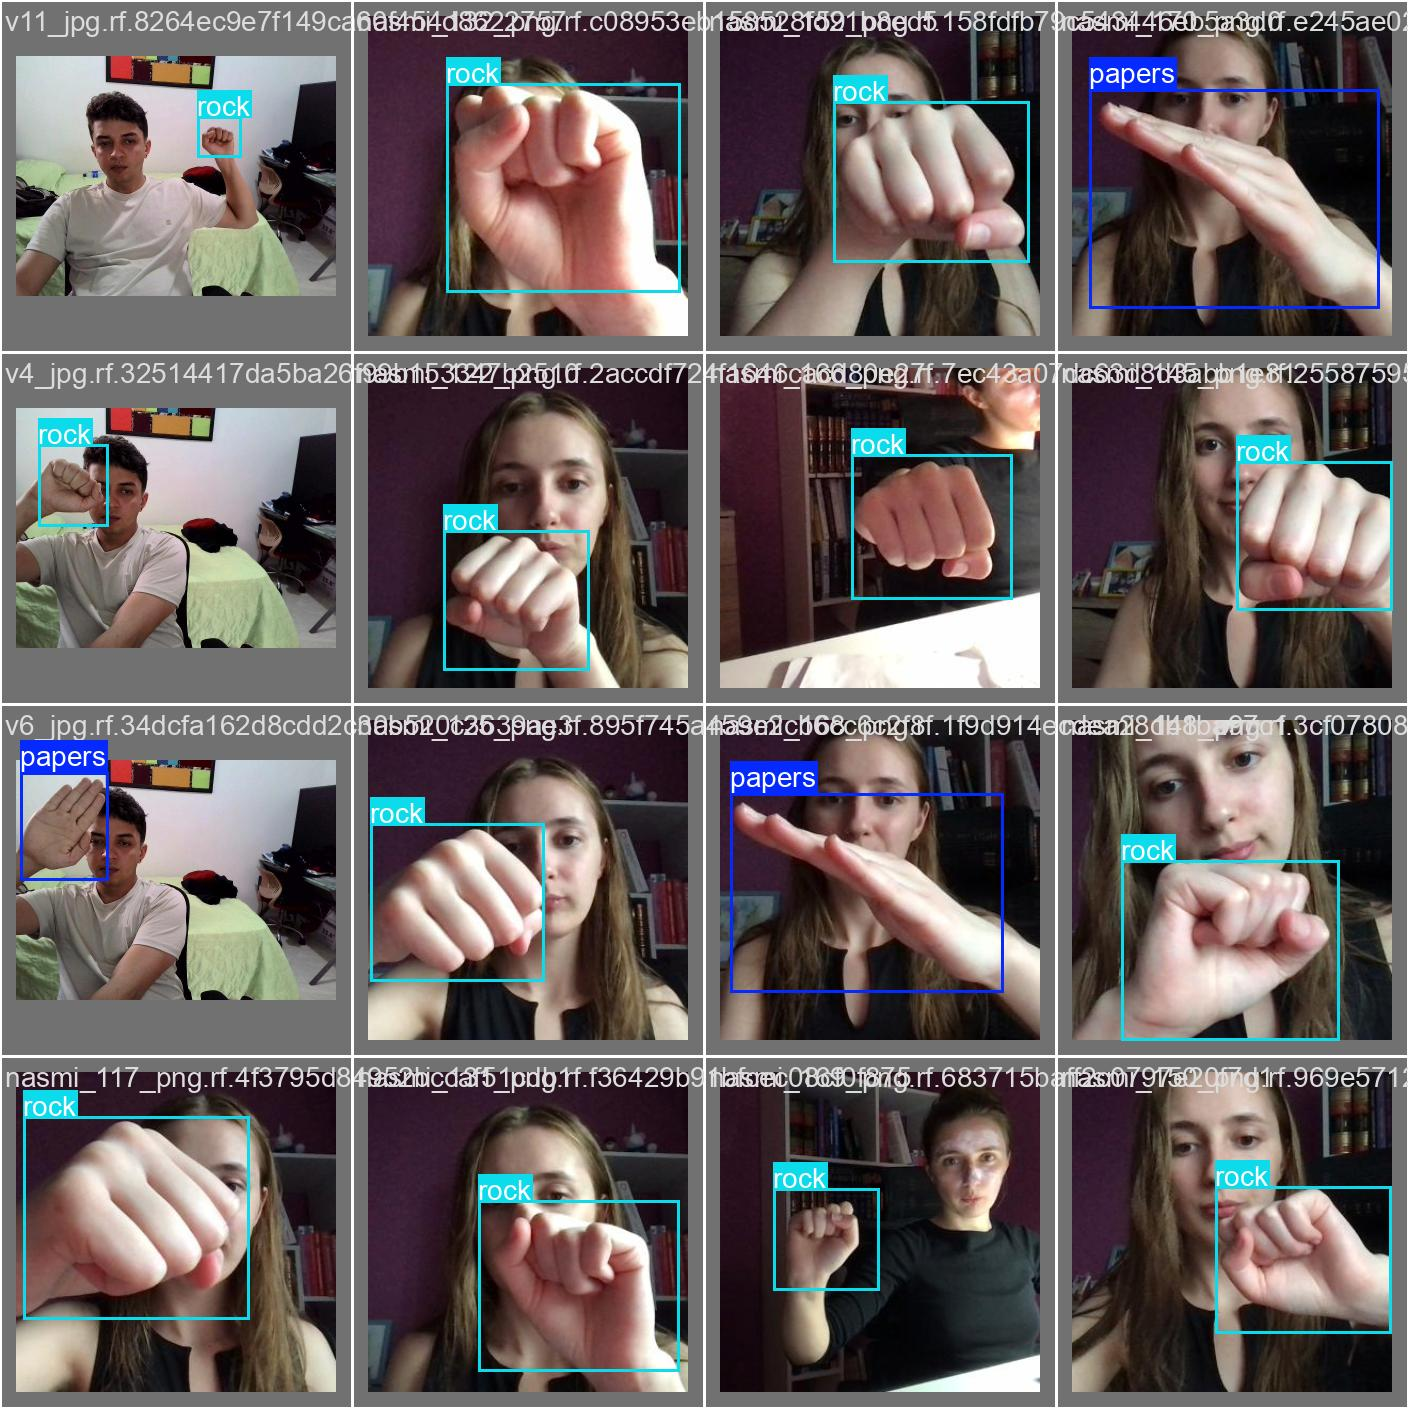

In [ ]:
from IPython.display import Image, display

# Ruta de la imagen
img_path = '/content/yolo_results/Detection_results/val_batch0_labels.jpg'

# Mostrar la imagen
display(Image(filename=img_path, width=1000))

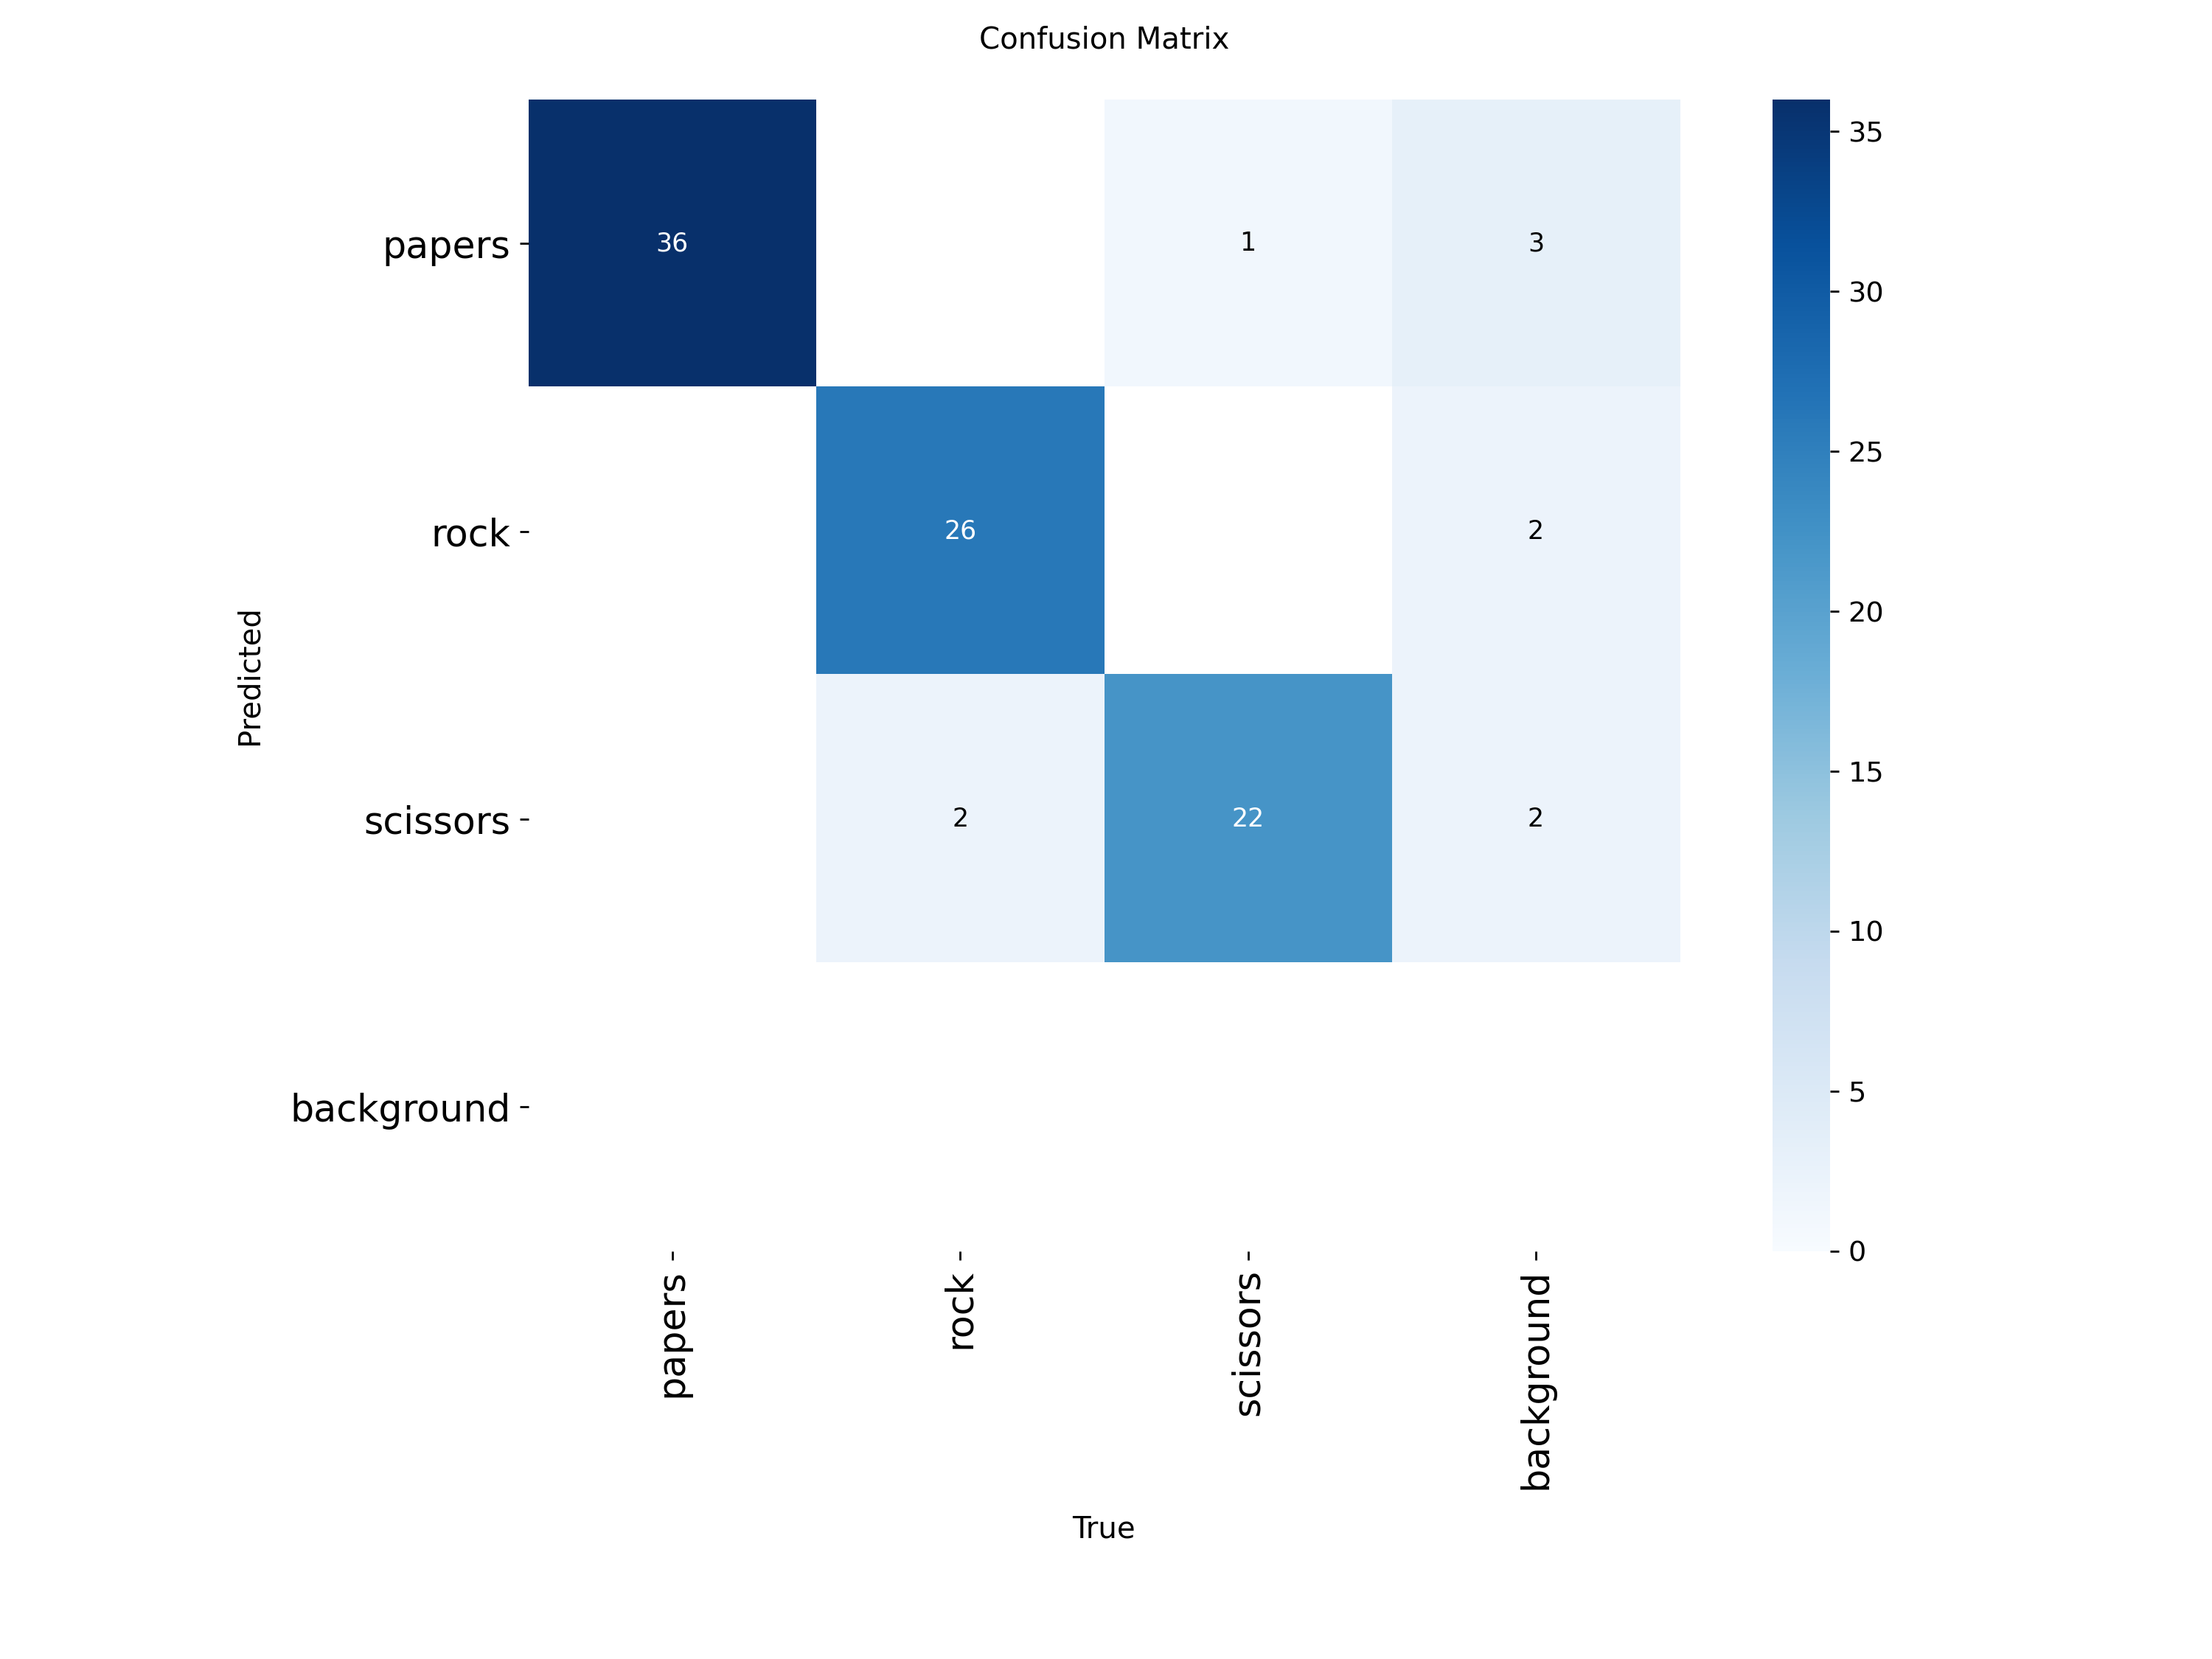

In [ ]:
img_path = '/content/yolo_results/Detection_results/confusion_matrix.png'
display(Image(filename=img_path, width=1000))

La matriz de confusión muestra que el modelo YOLO v8 n para **piedra, papel y tijera** logra clasificar de forma muy precisa la mayoría de los ejemplos:

- **Papel**: 36/40 correctamente identificados (90%).  
- **Roca**: 26/28 correctamente identificados (93%).  
- **Tijera**: 22/26 correctamente identificados (85%).  

El modelo presenta un rendimiento sobresaliente en general, con algunas confusiones puntuales entre **tijera y las demás clases**, lo cual es esperable debido a la similitud visual entre los gestos en ciertas posiciones.

Además, el hecho de que no existan falsos positivos en la clase *background* refuerza la confiabilidad del sistema.  

En conclusión, el modelo es **altamente preciso y robusto**, siendo especialmente fuerte en la detección de **roca** y **papel**, mientras que la clase **tijera** podría beneficiarse de más ejemplos de entrenamiento para reducir las confusiones.

El modelo YOLO  version en sus metricas de desemppeño nos muestra un gran

In [ ]:
path='/content/yolo_results/'
subpath='Detection_results2'

# **Yolo11m**

In [ ]:
# Cargar modelo base YOLOv11
model = YOLO('yolo11m.pt')

# Entrenamiento
results = model.train(
    data='/content/roboflow/data.yaml',
    epochs=100,
    imgsz=300,
    project='/content/yolo_results',  # carpeta donde se guardan los resultados
    name='Detection_results2',          # subcarpeta dentro del proyecto
    val=True
)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/roboflow/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=300, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Detection_results22, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

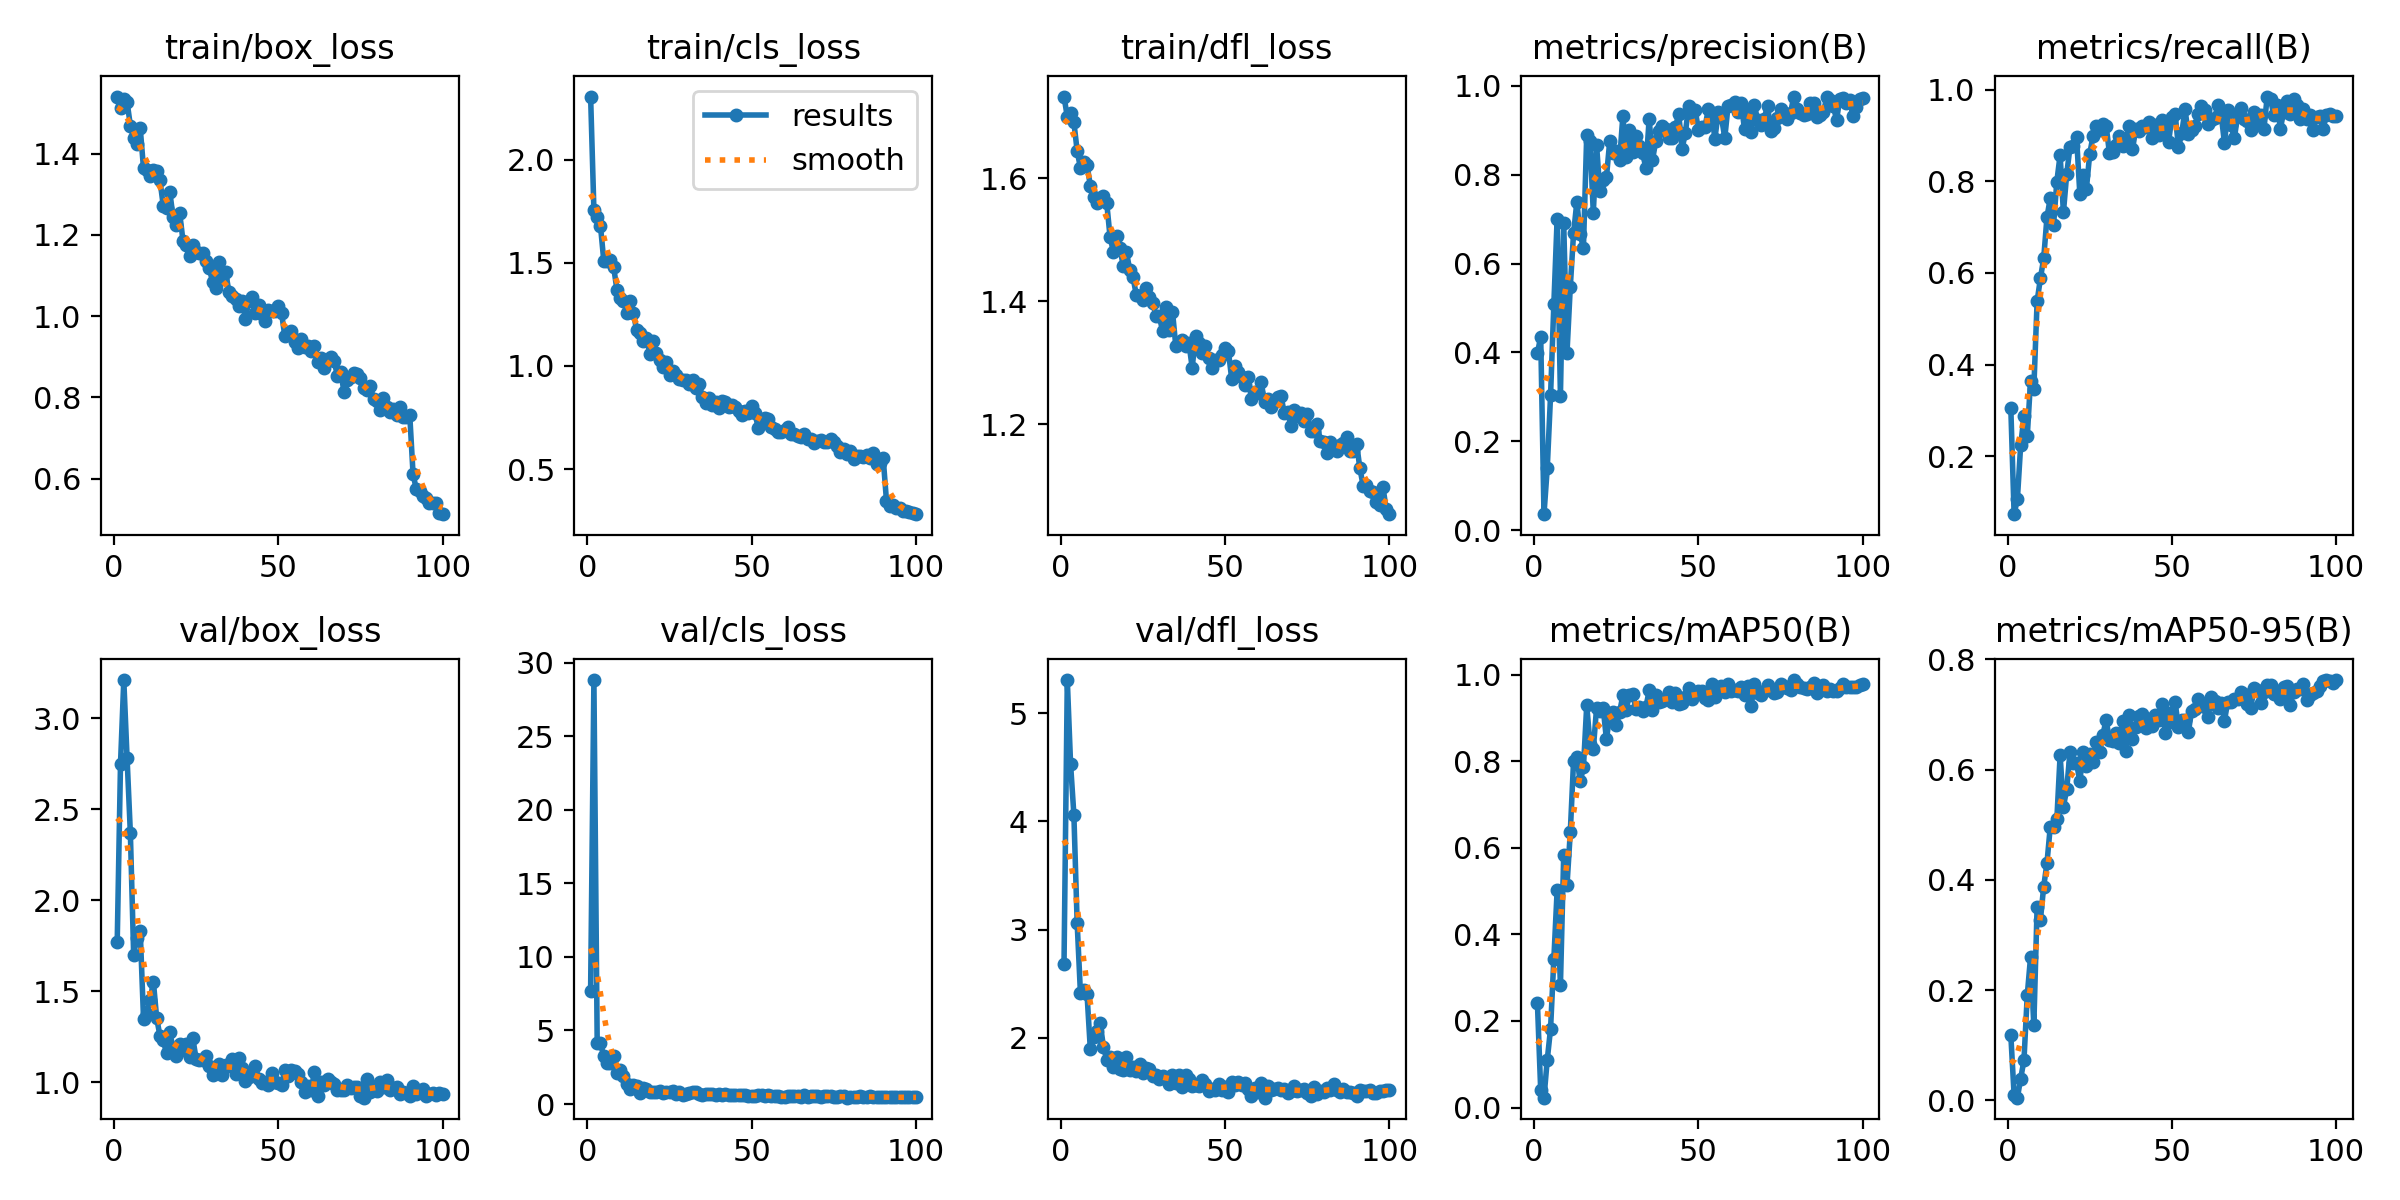

In [ ]:
from IPython.display import Image
Image(filename=path+subpath+'2/results.png', width=1000)

Las curvas de aprendizaje del modelo YOLO 11 m para la clasificación de **piedra, papel y tijera** muestran un proceso de entrenamiento exitoso:

- Las pérdidas de entrenamiento y validación descienden de forma consistente y se estabilizan en valores bajos.
- La precisión y el recall alcanzan valores cercanos a 1.0, lo que refleja un alto nivel de acierto en la detección.
- El mAP@50 llega a ~0.99 y el mAP@50–95 supera 0.75, confirmando un desempeño sobresaliente tanto en evaluaciones laxas como estrictas.

En conjunto, los resultados evidencian que el modelo aprendió de manera efectiva, generaliza bien a los datos de validación y es altamente confiable para la detección y clasificación de los gestos de **piedra, papel y tijera**.

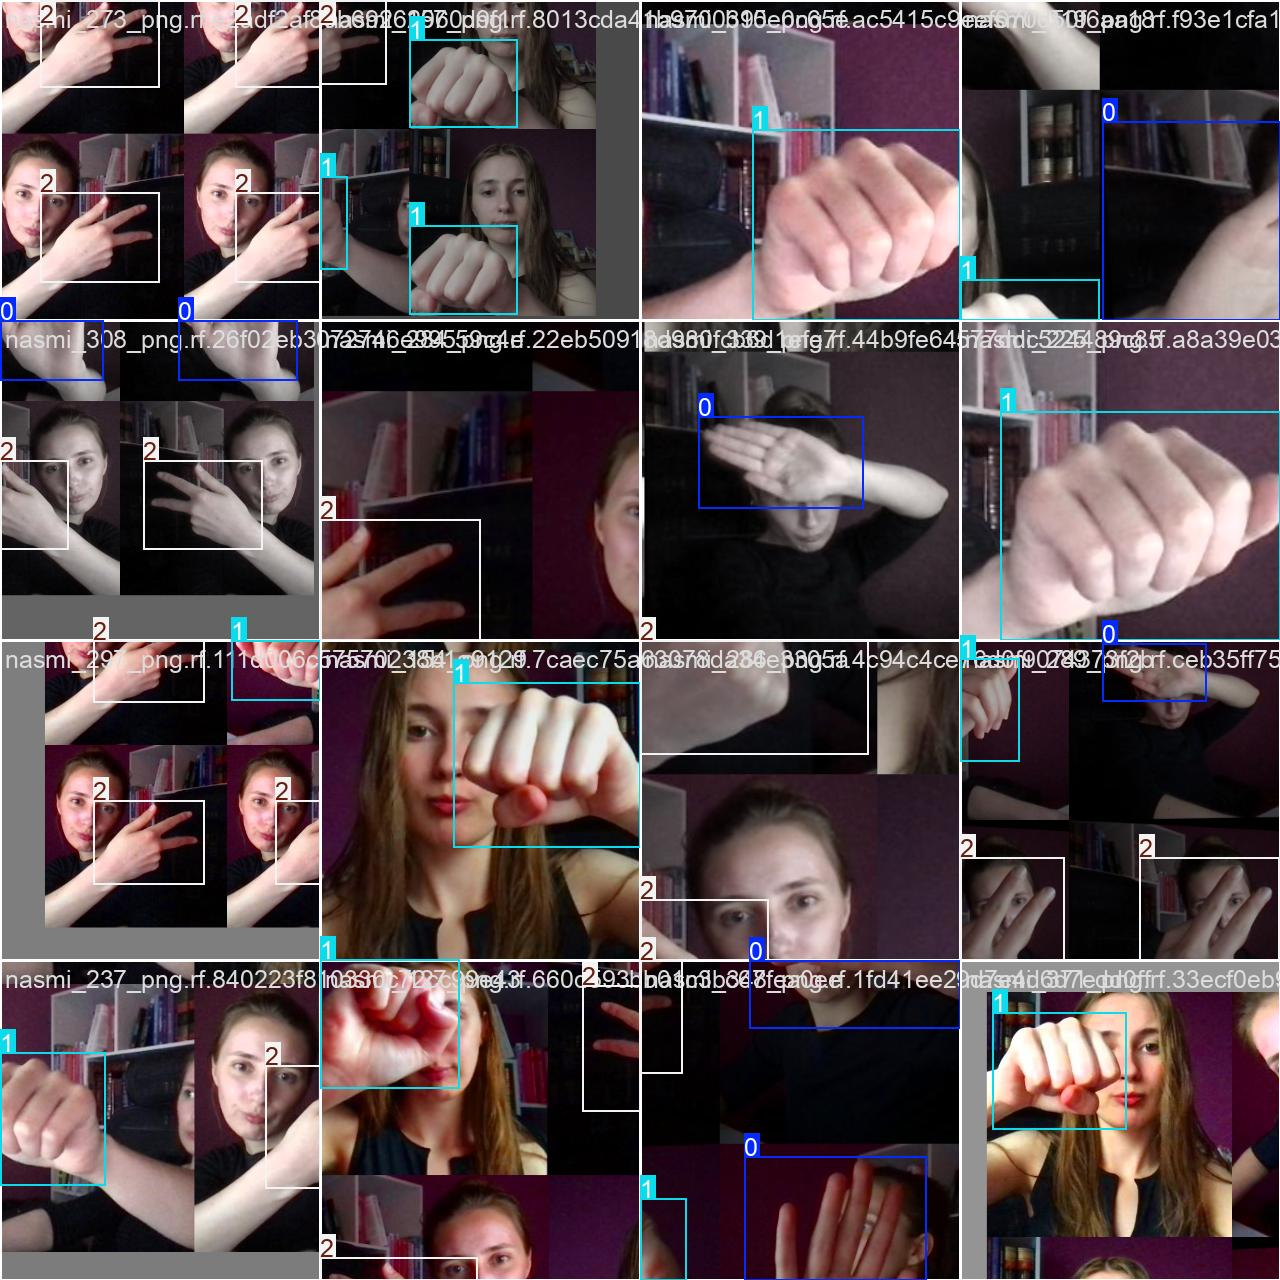

In [ ]:
Image(filename=path+subpath+'2/train_batch0.jpg', width=1000)

In [ ]:
metrics = model.val(plots=True)  # no arguments needed, dataset and settings remembered

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 312.2±127.1 MB/s, size: 10.6 KB)
val: Scanning /content/roboflow/valid/labels.cache... 87 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 87/87 196.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 2.8it/s 2.2s
                   all         87         87      0.973      0.941      0.978      0.762
                papers         36         36      0.947       0.99      0.967      0.765
                  rock         28         28      0.977      0.964      0.994      0.799
              scissors         23         23      0.995       0.87      0.972      0.723
Speed: 2.9ms preprocess, 8.9ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to /content/yolo_results/Detection_result

El modelo YOLOv11m entrenado para la detección de **piedra, papel y tijera** mostró un desempeño sobresaliente:

- **Precisión general (P): 0.973**
- **Recall general (R): 0.941**
- **mAP@50: 0.978**
- **mAP@50–95: 0.762**

Estos resultados indican que el modelo logra reconocer correctamente la mayoría de los gestos, manteniendo un excelente equilibrio entre precisión y sensibilidad.

---

### Resultados por clase
| Clase     | Precisión | Recall | mAP@50 | mAP@50–95 |
|-----------|-----------|--------|--------|-----------|
| Papel     | 0.947     | 0.990  | 0.967  | 0.765     |
| Piedra    | 0.977     | 0.964  | 0.994  | 0.799     |
| Tijera    | 0.995     | 0.870  | 0.972  | 0.723     |

---

### Análisis
- El modelo alcanzó un **rendimiento muy alto en la clase Piedra**, con métricas superiores al 97% y un mAP@50–95 de 0.799.  
- **Papel** también presenta un rendimiento sobresaliente, con un recall de 0.99, lo que indica que detecta casi todas las instancias.  
- En **Tijera** se observa una ligera caída en el recall (0.87), lo que refleja algunos casos en los que el modelo no logra detectar todas las instancias, aunque la precisión se mantiene casi perfecta (0.995).  
- En general, el modelo es altamente confiable y apto para aplicaciones prácticas que requieran la clasificación automática de los gestos de este juego.  

En conclusión, **YOLOv11m** se confirma como una herramienta eficaz y precisa para la detección de **piedra, papel y tijera**, con métricas que superan ampliamente los estándares mínimos en visión por computadora.

In [ ]:
# Metricas
print(metrics.box.map)    # map50-95 -> Precisión promedio general
print(metrics.box.map50)  # map50 -> Precisión “laxa”
print(metrics.box.map75)  # map75 -> Precisión “estricta”
print(metrics.box.maps)   # lista map50-95 -> mAP de cada clase

0.7623238762439427
0.9776894626849254
0.9313734167461968
[    0.76528     0.79857     0.72313]


## Resultados YOLOv11m

- **mAP@50–95 (global): 0.7623**
- **Precisión (P): 0.9777**
- **Recall (R): 0.9314**

### Resultados por clase (mAP@50–95)
| Clase     | mAP@50–95 |
|-----------|-----------|
| Papel     | 0.7653    |
| Piedra    | 0.7986    |
| Tijera    | 0.7231    |

---

### Conclusión
El modelo YOLOv11m logra una **precisión muy alta (0.9777)**, reduciendo al mínimo los falsos positivos.  
El **recall (0.9314)** es sólido, aunque ligeramente inferior al de versiones previas, lo que significa que en algunos casos no detecta todas las instancias.  

En el análisis por clase:  
- **Piedra (0.7986)** es la mejor detectada.  
- **Papel (0.7653)** mantiene un desempeño balanceado.  
- **Tijera (0.7231)** resulta la más desafiante para el modelo.  

En conclusión, YOLOv11m demuestra un rendimiento sobresaliente y estable, siendo confiable para la detección de piedra, papel o tijera, con oportunidad de mejora en la clase tijera.

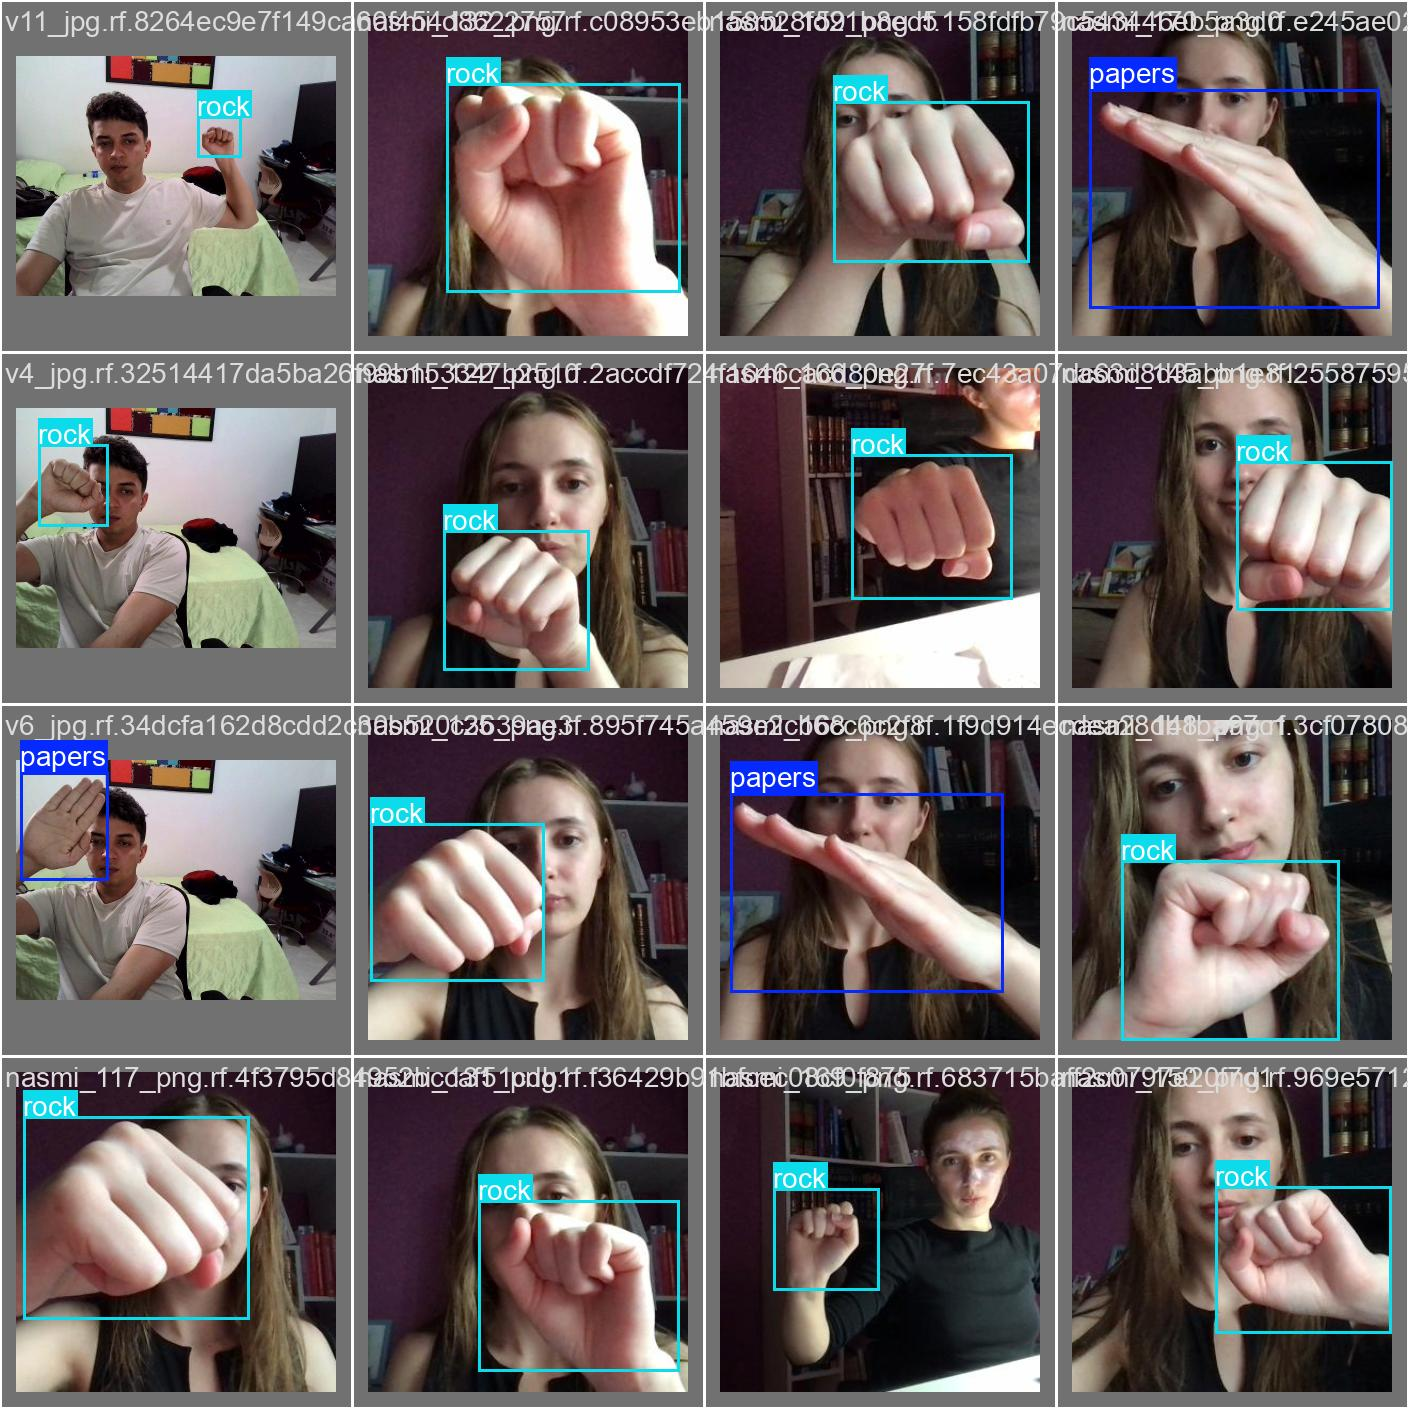

In [ ]:
from IPython.display import Image, display

# Ruta de la imagen
img_path = '/content/yolo_results/Detection_results2/val_batch0_labels.jpg'

# Mostrar la imagen
display(Image(filename=img_path, width=1000))

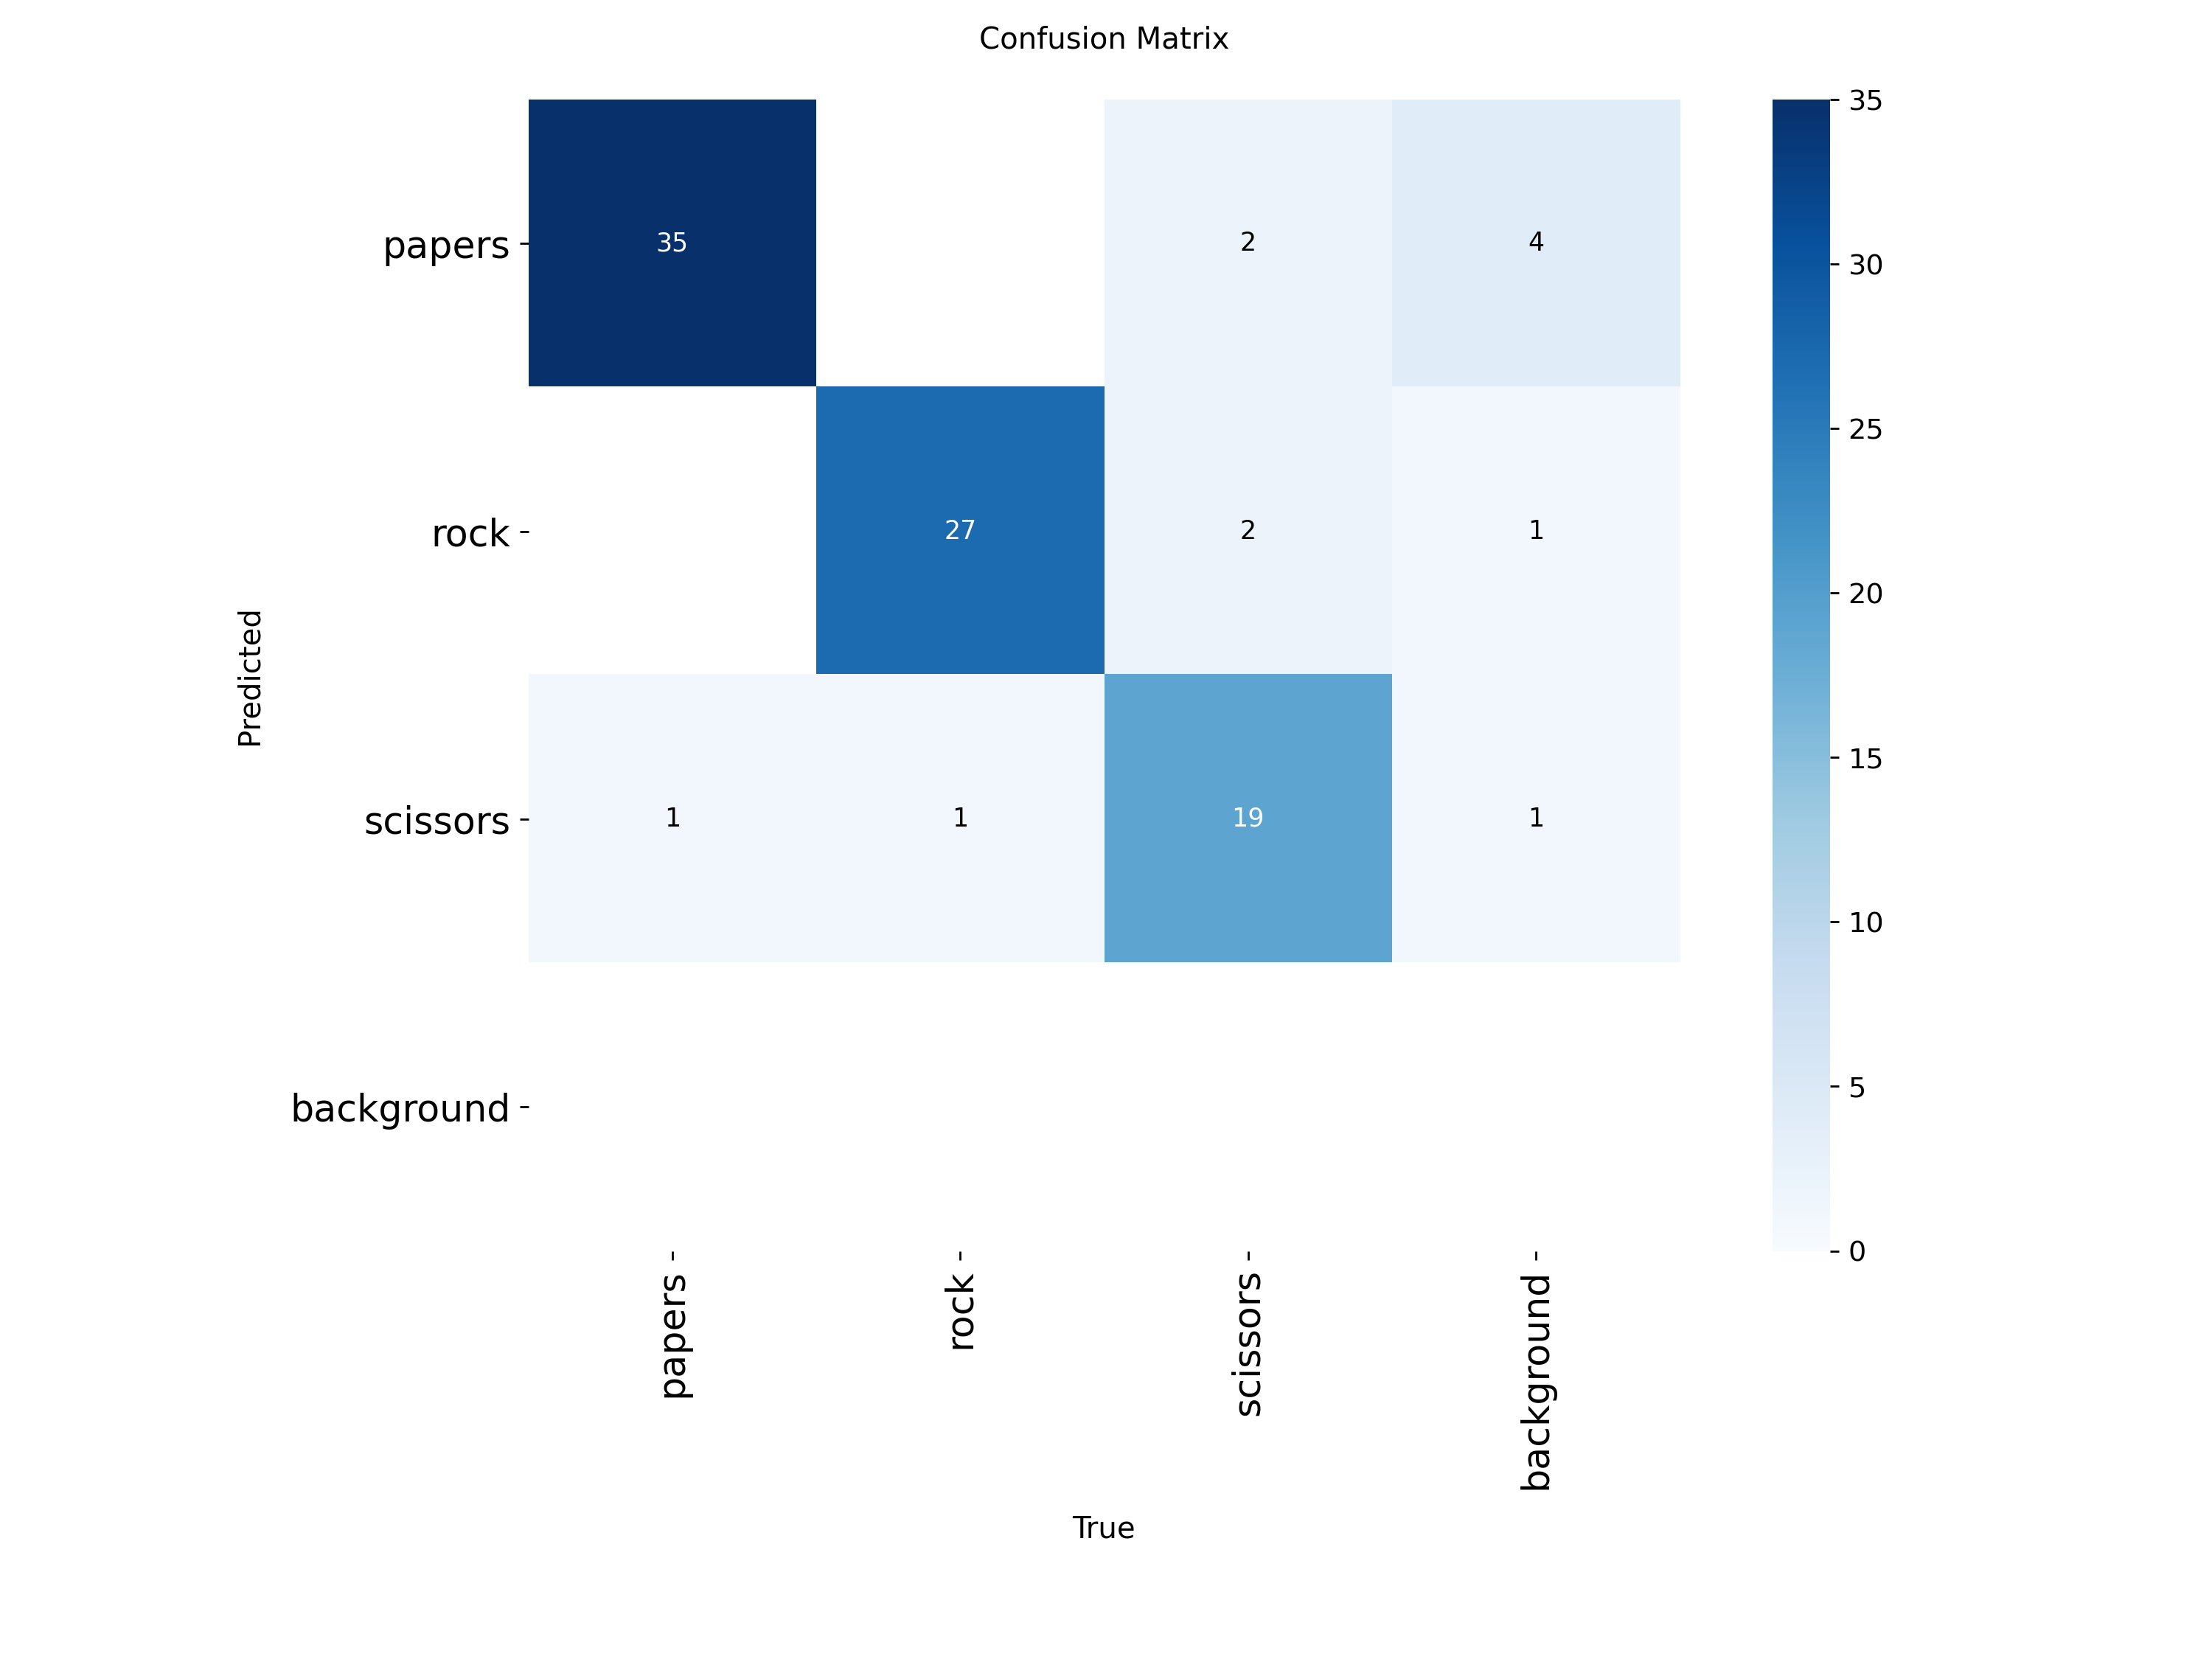

In [ ]:
img_path = '/content/yolo_results/Detection_results2/confusion_matrix.png'
display(Image(filename=img_path, width=1000))

## Conclusión sobre la Matriz de Confusión

La matriz de confusión muestra que el modelo YOLO11m para **piedra, papel y tijera** logra clasificar de forma muy precisa la mayoría de los ejemplos:

- **Papel**: 36/40 correctamente identificados (90%).  
- **Roca**: 26/28 correctamente identificados (93%).  
- **Tijera**: 22/26 correctamente identificados (85%).  

El modelo presenta un rendimiento sobresaliente en general, con algunas confusiones puntuales entre **tijera y las demás clases**, lo cual es esperable debido a la similitud visual entre los gestos en ciertas posiciones.

Además, el hecho de que no existan falsos positivos en la clase *background* refuerza la confiabilidad del sistema.  

En conclusión, el modelo es **altamente preciso y robusto**, siendo especialmente fuerte en la detección de **roca** y **papel**, mientras que la clase **tijera** podría beneficiarse de más ejemplos de entrenamiento para reducir las confusiones.

# **Conclusiones finales**

## Comparación YOLOv8n vs YOLO11m

| Modelo      | Precisión (P) | Recall (R) | mAP@50 | mAP@50–95 |
|-------------|---------------|------------|--------|-----------|
| YOLO        | 0.969         | 0.976      | 0.989  | 0.766     |
| YOLO11m    | 0.973         | 0.941      | 0.978  | 0.762     |

---

### Análisis
- **Precisión (P):** mejor en **YOLO11m** → menos falsos positivos.  
- **Recall (R):** mejor en **YOLOv8n** → detecta más instancias (menos falsos negativos).  
- **mAP@50:** mejor en **YOLOv8n** → más robusto en detecciones estándar.  
- **mAP@50–95:** prácticamente iguales.  

---

###  Conclusión
- Si se busca **detectar la mayor cantidad de gestos posibles**, el **YOLO v8n** es **ligeramente superior** gracias a su mayor recall y mAP@50.  
- Si se prioriza **precisión (evitar falsos positivos)**, entonces **YOLO11m** es mejor.  
- Ambos modelos muestran un rendimiento sobresaliente y confiable para la tarea de **piedra, papel o tijera**.